## 频域水印
source http://blog.jobbole.com/105968/

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

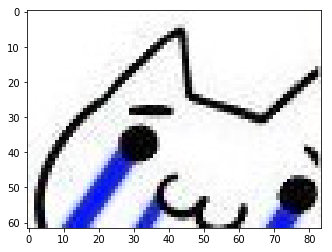

In [4]:
img = cv2.imread('1502601604.3813846-.jpg')
plt.imshow(img)

cv2.dft只接受1channel，先转灰阶

In [5]:
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img_float32 = np.float32(img_gray)
img_dft = cv2.dft(img_float32, flags = cv2.DFT_COMPLEX_OUTPUT)

(62, 84, 2)


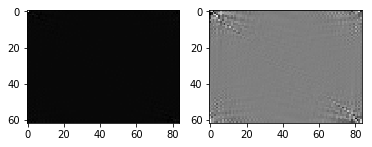

In [6]:
print(img_dft.shape)
plt.subplot(121)
plt.imshow(img_dft[:,:,0], cmap='gray')
plt.subplot(122)
plt.imshow(img_dft[:,:,1], cmap='gray')

`fftshift`  
是针对频域的，将FFT的DC分量移到频谱中心。
即对频域的图像，（假设用一条水平线和一条垂直线将频谱图分成四块）对这四块进行对角线的交换与反对角线的交换。  
`ifftshift`  
Inverse FFT shift.（就是fftshift的逆）

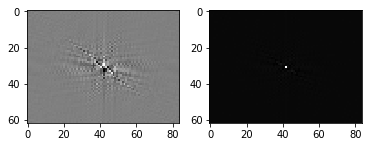

In [7]:
dft_shift = np.fft.fftshift(img_dft)
plt.subplot(121)
plt.imshow(dft_shift[:,:,0], cmap='gray')
plt.subplot(122)
plt.imshow(dft_shift[:,:,1], cmap='gray')

(62, 84, 2)
(62, 84)


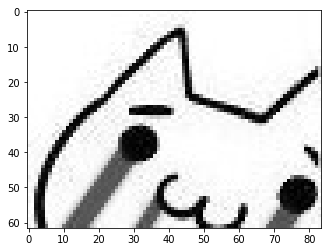

In [8]:
img_back = cv2.idft(img_dft)
print(img_back.shape)
img_back = cv2.magnitude(img_back[:,:,0],img_back[:,:,1])
print(img_back.shape)
plt.imshow(img_back, cmap='gray')

(56, 12)


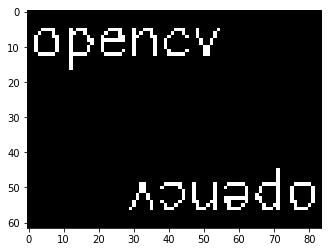

In [61]:
sign = np.zeros(img.shape, np.uint8)
text = 'opencv'
font = cv2.FONT_HERSHEY_SIMPLEX
text_size = .5
size, baseline = cv2.getTextSize(text, font, text_size, 1)
print(size)
# cv2.putText(sign, text, (int(sign.shape[1]/2-size[0]/2), int(sign.shape[0]/2+size[1]/2)), font, text_size, (255,255,255), 1)
cv2.putText(sign, text, (0, size[1]), font, text_size, (255,255,255), 1)
sign2 = cv2.flip(sign, -1)
sign+=sign2
plt.imshow(sign)

```
cv2.threshold(src,thresh,maxval,type[,dst])->retval,dst 用于获取二元值的灰度图像 
    thresh:阈值
    maxval:在二元阈值THRESH_BINARY和逆二元阈值THRESH_BINARY_INV中使用的最大值 
返回值retval:其实就是阈值 
    type:使用的阈值类型 
        THRESH_BINARY 
        dst(x,y)={maxval if src(x,y) > thresh 
                 {0      otherwise 
        THRESH_BINARY_INV 
        dst(x,y)={0 if src(x,y) > thresh 
                 {maxval      otherwise 
        THRESH_TRUNC 
        dst(x,y)={thresh if src(x,y) > thresh 
                 {src(x,y)      otherwise 
        THRESH_TOZERO 
        dst(x,y)={src(x,y) if src(x,y) > thresh 
                 {0   otherwise 
        THRESH_TOZERO_INV 
        dst(x,y)={0 if src(x,y) > thresh 
                 {src(x,y) otherwise 
```

[  0   0 255   0   0   0   0   0 255   0   0   0 255   0   0   0   0 255
   0   0   0 255   0   0   0   0   0   0   0   0 255   0   0   0   0   0
 255   0   0 255   0   0   0   0   0   0   0   0   0   0 255 255   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0]


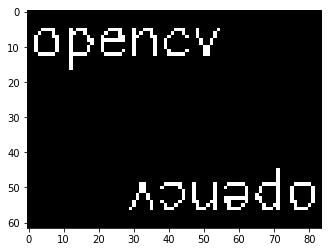

In [123]:
sign_gray = cv2.cvtColor(sign, cv2.COLOR_BGR2GRAY)
_,sign_bin = cv2.threshold(sign_gray, 0, 255, cv2.THRESH_BINARY)
print(sign_bin[10,:])
plt.imshow(sign_bin, cmap='gray')

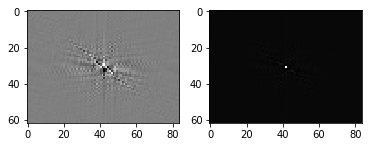

In [63]:
dft_shift_signed = dft_shift.copy()
dft_shift_signed[:,:,0] += sign_bin
plt.subplot(121)
plt.imshow(dft_shift_signed[:,:,0], cmap='gray')
plt.subplot(122)
plt.imshow(dft_shift_signed[:,:,1], cmap='gray')

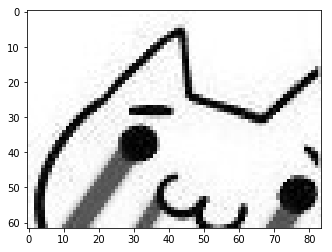

In [125]:
dft_signed = np.fft.ifftshift(dft_shift_signed)
signed_back = cv2.idft(dft_signed, flags=cv2.DFT_SCALE)
signed_back = cv2.magnitude(signed_back[:,:,0],signed_back[:,:,1])
plt.imshow(signed_back, cmap='gray')

>Note: None of `dft` and `idft` scales the result by default. So, you should pass `DFT_SCALE` to one of `dft` or `idft` explicitly to make these transforms mutually inverse.  
from https://stackoverflow.com/questions/30127283/how-to-get-accurate-idft-result-from-opencv

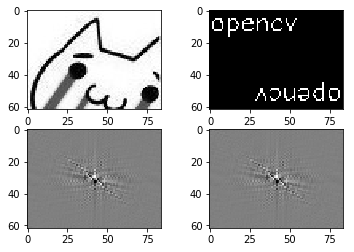

In [126]:
dft_signed_back = cv2.dft(signed_back,  flags = cv2.DFT_COMPLEX_OUTPUT)
dft_signed_back_shift = np.fft.fftshift(dft_signed_back)
hypersis_sign = dft_signed_back_shift[:,:,0] - dft_shift[:,:,0]
plt.subplot(221)
plt.imshow(signed_back, cmap='gray')
plt.subplot(222)
plt.imshow(sign_bin, cmap='gray')
plt.subplot(223)
plt.imshow(dft_signed_back_shift[:,:,0], cmap='gray')
plt.subplot(224)
plt.imshow(dft_shift[:,:,0], cmap='gray')

[-0.23583984 -5.41381836 -4.82653809  0.15161133 -0.01611328 -0.02026367
 -0.01831055 -0.01782227 -5.03302002 -0.09777832  0.18206787  0.05345154
 -0.04333496  0.23791504  0.22924805  0.08032227  0.12902832 -0.2456665
 -0.08129883  5.05725098 -0.18457031  0.08221436 -4.75488281 -0.11804199
 -0.08740234 -5.15197754 -0.09106445  4.80395508  4.75341797  0.28125
 -0.05541992 -0.10839844  0.26904297  5.15332031 -0.12402344 -4.66796875
  4.81640625 -0.16015625 -4.83447266 -5.19140625  0.2734375  -4.921875
 -4.74609375 -0.13867188 -0.23925781 -5.10498047  5.00878906 -0.35546875
  0.2878418   5.06054688 -0.12463379 -4.73046875  4.921875    0.18554688
 -0.06835938 -0.09472656 -0.20751953 -4.8359375  -0.30126953  0.26855469
  0.04248047  0.05517578  0.1373291  -0.29217529 -0.03808594 -0.21417236
 -4.97891235  0.06225586  0.15844727  0.02600098  0.16320801 -0.30163574
 -4.78881836 -4.82928467 -0.33349609  0.06466675  0.21972656  0.01785278
  0.00952148  0.40933228  5.00299072 -0.09420776 -0.39788

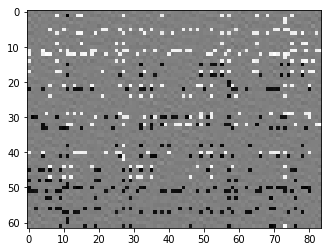

In [127]:
print(hypersis_sign[30,:])
plt.imshow(hypersis_sign, cmap='gray')

由于水印没有中心对称，所以加完水印的图dft出来之后，会有一个和水印中心对称的值为0的图形。  
其他区域会多少有些噪声。

(62, 84)


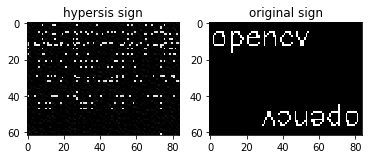

In [128]:
print(hypersis_sign.shape)
_, hypersis_sign_fix =cv2.threshold(hypersis_sign , 0 ,0 ,cv2.THRESH_TOZERO)
plt.subplot(121)
plt.imshow(hypersis_sign_fix, cmap='gray')
plt.title('hypersis sign')
# plt.xticks([]), plt.yticks([])
plt.subplot(122)
plt.imshow(sign_bin, cmap='gray')
plt.title('original sign')
# plt.xticks([]), plt.yticks([])

(62, 84)


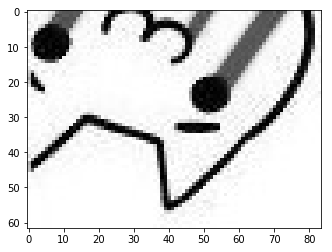

In [120]:
offset = 2
attack_img = np.zeros(signed_back.shape)
# attack_img = signed_back[:-offset,:].copy()
# attack_img = np.vstack((attack_img, attack_img[:offset,:]))
attack_img = cv2.flip(signed_back, -1)
print(attack_img.shape)
plt.imshow(attack_img, cmap='gray')

(62, 84)


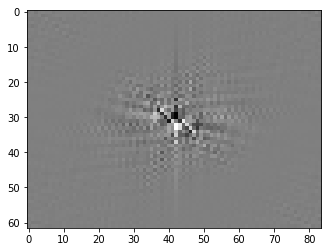

In [132]:
def get_sign(img, signed_img):
#     dft_img = cv2.dft(img,  flags = cv2.DFT_COMPLEX_OUTPUT)
#     dft_img_shift = np.fft.fftshift(dft_img)
    dft_signed_img = cv2.dft(signed_img,  flags = cv2.DFT_COMPLEX_OUTPUT)
    dft_signed_img_shift = np.fft.fftshift(dft_signed_img)
    ssign = dft_signed_img_shift[:,:,0] - dft_shift[:,:,0]
    print(ssign.shape)
    plt.imshow(ssign, cmap='gray')
    
get_sign(img_float32, attack_img)

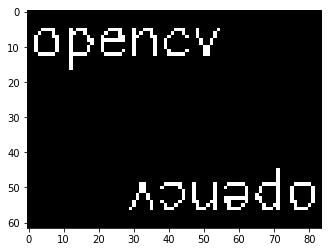

In [111]:
def encode(img):
    h, w = img.shape
    encode_img = np.zeros((h,w))
    h_map = np.random.permutation(h)
    v_map = np.random.permutation(w)
    for i in range(h):
        for j in range(w):
            encode_img[i, j] = img[h_map[i], v_map[j]]
    return encode_img, h_map, v_map

encode_sign, h_map, v_map = encode(sign_bin)

def decode(img, h_map, v_map):
    h, w = img.shape
    decode_img = np.zeros((h,w))
    for i in range(h):
        for j in range(w):
            decode_img[i, j] = img[h_map.tolist().index(i), v_map.tolist().index(j)]
    return decode_img
    
decode_sign = decode(encode_sign, h_map, v_map)   
plt.imshow(decode_sign, cmap='gray')

In [124]:
dft_shift_signed = dft_shift.copy()
dft_shift_signed[:,:,0] += encode_sign

[ -3.33801270e-01  -4.11010742e-01   4.87084961e+00   1.52587891e-02
   2.02636719e-01   2.77587891e-01   2.25769043e-01   4.77301025e+00
   1.15966797e-03   1.59454346e-01]


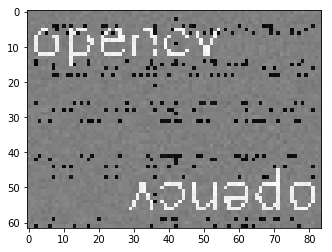

In [137]:
ttt=decode(hypersis_sign, h_map, v_map)
plt.imshow(ttt, cmap='gray')
print(ttt[10,10:20])